# Reading spreadsheets

## Google Sheets

To read in Google Sheets spreadsheets we can use the [GoogleSheets4](https://googlesheets4.tidyverse.org/) package.

In [1]:
library('googlesheets4')

To read in a public sheet, we can turn off authentication.

In [2]:
gs4_deauth()

[GapMinder](https://docs.google.com/spreadsheets/d/1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY)

gapminder is a public dataset that tracks gdp for diff countries

We can read this sheet into our R session with the url or the sheet ID.
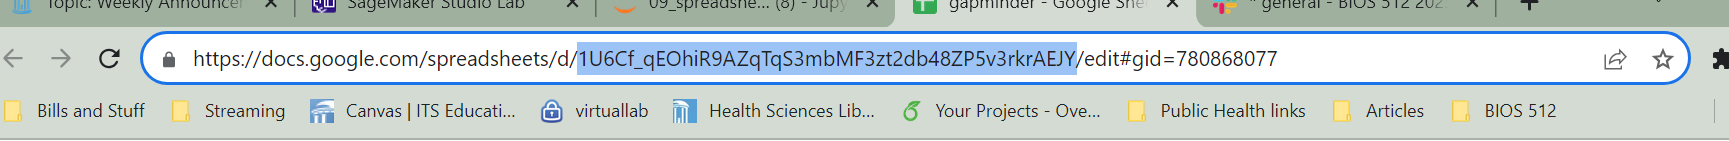

In [3]:
gapminder = read_sheet('1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY')

✔ Reading from gapminder.

✔ Range Africa.



In [7]:
gapminder |> head()

country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,Africa,1952,43.077,9279525,2449.008
Algeria,Africa,1957,45.685,10270856,3013.976
Algeria,Africa,1962,48.303,11000948,2550.817
Algeria,Africa,1967,51.407,12760499,3246.992
Algeria,Africa,1972,54.518,14760787,4182.664
Algeria,Africa,1977,58.014,17152804,4910.417


In [4]:
# We can specify a "sheet" with the sheet argument

gapminder_americas = read_sheet('1U6Cf_qEOhiR9AZqTqS3mbMF3zt2db48ZP5v3rkrAEJY', sheet = 'Americas')

gapminder_americas |> head()

✔ Reading from gapminder.

✔ Range ''Americas''.



country,continent,year,lifeExp,pop,gdpPercap
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Argentina,Americas,1952,62.485,17876956,5911.315
Argentina,Americas,1957,64.399,19610538,6856.856
Argentina,Americas,1962,65.142,21283783,7133.166
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027


In [5]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


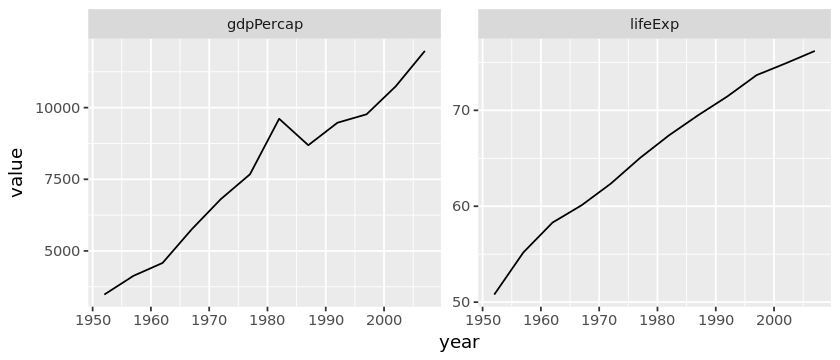

In [6]:
options(repr.plot.height = 3)

gapminder_americas |> 
    filter(country == 'Mexico') |>
    pivot_longer(cols = c(lifeExp, gdpPercap), names_to = 'metric') |>
ggplot(aes(x = year, y = value)) +
    geom_line() +
    facet_wrap(~metric, scales = 'free_y')

### Reading a private spreadsheet (from Jupyter)

We need to "authenticate" with Google (google changed how they do authentication, Chuck will cover later so don't worry about next line)

In [30]:
# assignInNamespace("is_interactive", function() {TRUE}, "httr")

# rlang::with_interactive({gs4_auth(use_oob=TRUE, cache=FALSE)})

**Always comment out the auth code after running it so you don't accidentally make your token available!**

[Private MPG spreadsheet](https://docs.google.com/spreadsheets/d/1_Ah35BO9_bYlRsPm_B_v5XU9fmUOVxF6NTTrSNvUCkU)

In [33]:
mpg_from_gsheets = read_sheet('1_Ah35BO9_bYlRsPm_B_v5XU9fmUOVxF6NTTrSNvUCkU')

mpg_from_gsheets |> head()

✔ Reading from mpg.

✔ Range mpg.



manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<list>,<dbl>,<dbl>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## Excel 

We can use the [readxl]() package to read in Excel spreadsheets.

In [7]:
library('readxl')

In [8]:
mpg_from_excel = read_excel('mpg.xlsx') 

mpg_from_excel |> head()
#excel file needs to be available in environment

ERROR: Error: `path` does not exist: ‘mpg.xlsx’
